In [1]:
import tensorflow as tf
import numpy as np

# GETTING THE DATA

In [2]:
import pandas as pd
df = pd.read_csv('BTC_USD_2014-11-04_2021-12-03-CoinDesk.csv',
                parse_dates = ["Date"],
                index_col = ["Date"])

In [3]:
df.head(10)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2014-11-04,BTC,324.467934,323.826186,333.539527,323.106623
2014-11-05,BTC,328.644408,324.424164,330.671610,320.902900
2014-11-06,BTC,337.921358,328.653046,342.384170,328.597125
2014-11-07,BTC,348.992860,337.921358,352.585895,336.236830
2014-11-08,BTC,341.459753,348.992860,351.651854,340.196145
2014-11-09,BTC,344.745289,341.459753,346.475560,340.357542
2014-11-10,BTC,357.239982,344.745289,357.986991,342.082083
2014-11-11,BTC,371.116917,371.116917,371.116917,371.116917
2014-11-12,BTC,366.664633,367.921363,370.800015,361.225098


In [4]:
df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2587.000000,2587.000000,2587.000000,2587.000000
mean,10506.981786,10485.620695,10795.323022,10140.408762
std,15358.759450,15333.933630,15782.180264,14824.926480
min,178.016008,178.016008,211.673245,169.146791
25%,612.405587,611.768016,615.590685,607.477402
50%,6193.620000,6189.560458,6346.690000,6016.419870
75%,10142.146805,10134.557348,10377.445994,9739.233235
max,67553.948930,67554.840000,68990.900000,66316.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2587 entries, 2014-11-04 to 2021-12-03
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2587 non-null   object 
 1   Closing Price (USD)  2587 non-null   float64
 2   24h Open (USD)       2587 non-null   float64
 3   24h High (USD)       2587 non-null   float64
 4   24h Low (USD)        2587 non-null   float64
dtypes: float64(4), object(1)
memory usage: 121.3+ KB


In [6]:
# we will only predict the closing price
df_cp = pd.DataFrame(df['Closing Price (USD)']).rename(columns = {'Closing Price (USD)':'Price'})

In [7]:
df_cp.head()

,Price
Date,
2014-11-04,324.467934
2014-11-05,328.644408
2014-11-06,337.921358
2014-11-07,348.992860
2014-11-08,341.459753


# PLOTTING OUR DATA

<AxesSubplot:xlabel='Date'>

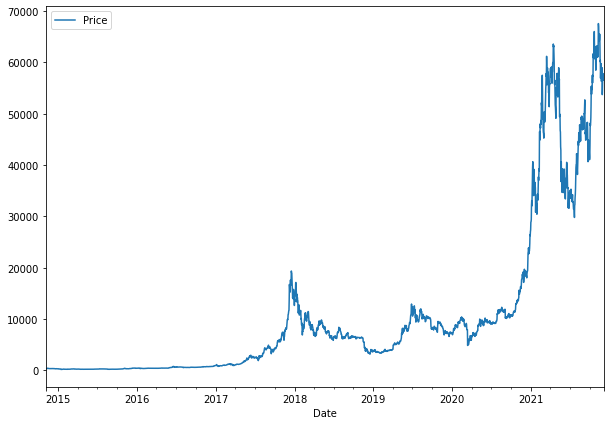

In [8]:
import matplotlib.pyplot as plt
df_cp.plot(figsize=(10,7))

# CREATING TRAINING AND TEST DATA (the incorrect way)

In [9]:
prices = df_cp['Price'].to_numpy()
timesteps = df_cp.index.to_numpy()
prices[:10],timesteps[:10]

(array([324.467934, 328.644408, 337.921358, 348.99286 , 341.459753,
        344.745289, 357.239982, 371.116917, 366.664633, 428.882925]),
 array(['2014-11-04T00:00:00.000000000', '2014-11-05T00:00:00.000000000',
        '2014-11-06T00:00:00.000000000', '2014-11-07T00:00:00.000000000',
        '2014-11-08T00:00:00.000000000', '2014-11-09T00:00:00.000000000',
        '2014-11-10T00:00:00.000000000', '2014-11-11T00:00:00.000000000',
        '2014-11-12T00:00:00.000000000', '2014-11-13T00:00:00.000000000'],
       dtype='datetime64[ns]'))

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(timesteps,
                                             prices,
                                            test_size = 0.2,
                                            random_state = 42)

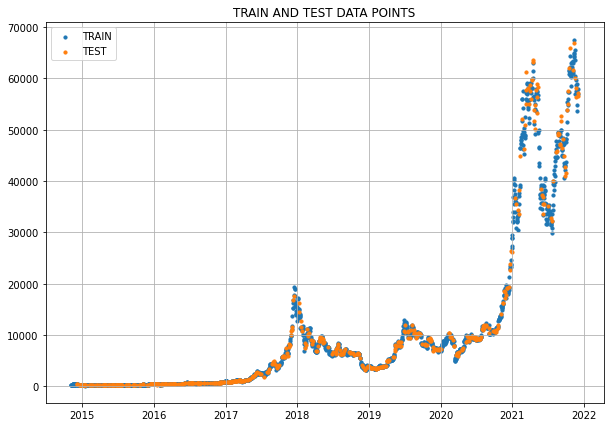

In [11]:
plt.figure(figsize=(10,7))
plt.title("TRAIN AND TEST DATA POINTS")
plt.scatter(xtrain,ytrain,s=10)
plt.scatter(xtest,ytest,s=10)
plt.legend(["TRAIN","TEST"])
plt.grid(True)
#WE CAN SEE THAT THERE IS A SLIGHT DATA LEAK SINCE WE WILL BE MISSING OUT ON A FEW TRAINING POINTS SINCE THEY HAVE BECOME A 
#PART OF THE TEST DATA

# CREATING TRAINING AND TEST DATA (the correct way)

In [12]:
trainlen = int(len(timesteps)*0.8)
xtrain = timesteps[:trainlen]
xtest = timesteps[trainlen:]
ytrain = prices[:trainlen]
ytest = prices[trainlen:]
len(xtrain),len(ytrain),len(xtest),len(ytest)

(2069, 2069, 518, 518)

# CREATING FUNCTION TO VISUALIZE TIME SERIES DATA

In [13]:
def plot_timeseries(timesteps,values,label = None,format = '.',start = 0):
    plt.plot(timesteps[start:],values[start:],format,label=label)
    plt.xlabel("TIMESTEPS")
    plt.ylabel("VALUES")
    plt.legend()

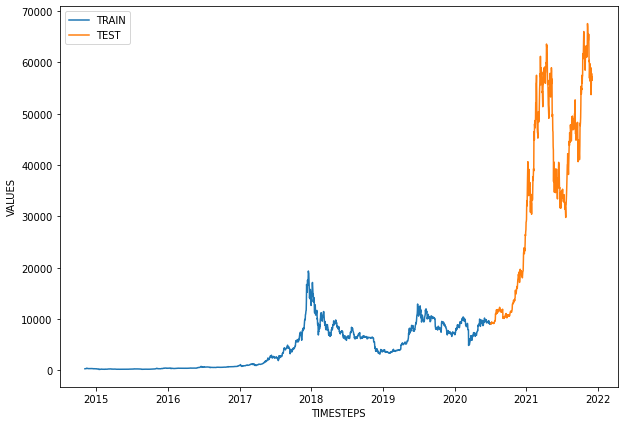

In [14]:
plt.figure(figsize=(10,7))
plot_timeseries(xtrain,ytrain,label="TRAIN",format='-')
plot_timeseries(xtest,ytest,label="TEST",format='-')

# LIST OF MODELLING EXPERIMENTS:
| EXPERIMENT NUMBER | EXPERIMENT NAME 
| :- | :-:
| 0 | NAIVE MODEL(BASELINE) 
| 1 | DENSE MODEL HORIZON = 1, WINDOW SIZE = 7 
| 2 | DENSE MODEL 2 HORIZON = 1, WINDOW SIZE = 30
| 3 | DENSE MODEL 3 HORIZON = 7, WINDOW SIZE = 30
| 4 | CONV-1D 
| 5 | LSTM 
| 6 | DENSE MODEL 4 
| 7 | N-BEATS ALGORITHM 
| 8 | ENSEMBLE 


# NAIVE MODEL 

In [15]:
# the naive model forecasts the current value as the next value and it is very difficult to beat the results of the 
# baseline naive model
naive_forecast = ytest[:-1]
ytest[-10:],naive_forecast[-10:]

(array([57576.849631, 57193.709727, 58959.315555, 53712.21    ,
        54784.9     , 57303.185972, 57834.357549, 56973.182042,
        57237.271634, 56524.829562]),
 array([56309.762162, 57576.849631, 57193.709727, 58959.315555,
        53712.21    , 54784.9     , 57303.185972, 57834.357549,
        56973.182042, 57237.271634]))

# PLOTTING THE PREDICTIONS OF THE NAIVE MODEL

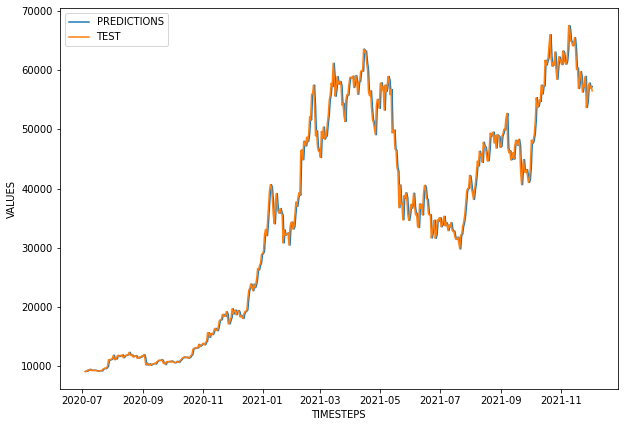

In [16]:
plt.figure(figsize=(10,7))
plot_timeseries(xtest[1:],naive_forecast,label="PREDICTIONS",format='-')
plot_timeseries(xtest,ytest,label="TEST",format='-')

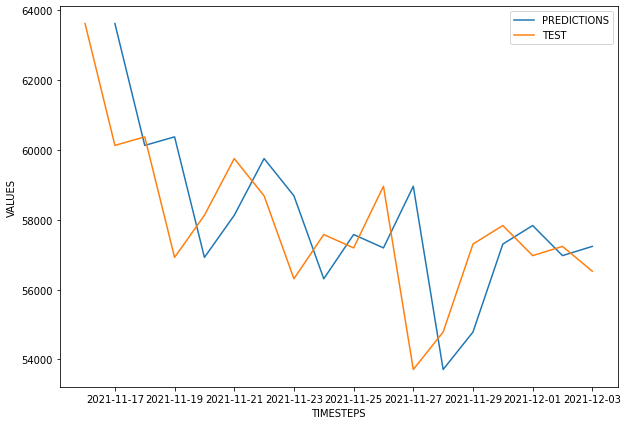

In [17]:
plt.figure(figsize=(10,7))
plot_timeseries(xtest[1:],naive_forecast,label="PREDICTIONS",format='-',start=500)
plot_timeseries(xtest,ytest,label="TEST",format='-',start=500)

# EVALUATING NAIVE MODEL

In [18]:
from sklearn.metrics import mean_absolute_error
def mean_absolute_scaled_error(y_true, y_pred, y_train):
    import numpy as np
    e_t = y_true - y_pred
    scale = mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))

In [19]:
def model_report(ytest,forecast):
    
    mae = tf.keras.losses.MeanAbsoluteError()
    mae = mae(ytest,forecast).numpy()
    mse = tf.keras.losses.MeanSquaredError()
    mse = mse(ytest,forecast).numpy()
    rmse = tf.sqrt(mse).numpy()
    mape = tf.keras.losses.mean_absolute_percentage_error(ytest,forecast).numpy()
    if mape.ndim>0:
        mape = tf.reduce_mean(mape).numpy()
    dict = {
        "MEAN ABSOLUTE ERROR":mae,
        "MEAN SQUARED ERROR":mse,
        "ROOT MEAN SQUARED ERROR":rmse,
        "MEAN ABSOLUTE PERCENTAGE ERROR":mape,
    }
    return dict

In [20]:
model0_report = model_report(ytest[1:],naive_forecast)
model0_report

{'MEAN ABSOLUTE ERROR': 1053.4937744140625,
 'MEAN SQUARED ERROR': 2533305.0,
 'ROOT MEAN SQUARED ERROR': 1591.6359508380049,
 'MEAN ABSOLUTE PERCENTAGE ERROR': 2.783683044788772}

# DIVIDING DATA INTO WINDOWS

In [21]:
def make_windows(window_size,horizon_size,data):
    i = 0
    windowed_data = []
    horizon = []
    while(i+window_size+horizon_size<=len(data)):
        lab_data = []
        lab_label = []
        for j in range(i,i+window_size):
            lab_data.append(data[j])
        for j in range(i+window_size,i+window_size+horizon_size):
            lab_label.append(data[j])
        windowed_data.append(lab_data)
        horizon.append(lab_label)
        i+=1
    return np.array(windowed_data),tf.squeeze(np.array(horizon)).numpy()

In [22]:
windows,horizon = make_windows(7,1,prices)

# SPLITTING WINDOWS AND HORIZONS INTO TRAINING AND TESTING DATA

In [23]:
train_win = windows[:int(len(windows)*0.85)]
train_hor = horizon[:int(len(windows)*0.85)]
test_win = windows[int(len(windows)*0.85):]
test_hor = horizon[int(len(windows)*0.85):]
train_win.shape,test_win.shape,train_hor.shape,test_hor.shape

((2193, 7), (387, 7), (2193,), (387,))

# CREATING MODELLING CALLBACK

In [24]:
def create_model_checkpoint(filename):
    import tensorflow as tf
    return tf.keras.callbacks.ModelCheckpoint(filename, 
                                              save_best_only=True)

# MODEL1

In [25]:
# window = 7, horizon = 1
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(1,activation="linear")
],name="model1")
model1.compile(optimizer = tf.keras.optimizers.Adam(), loss = "mae", metrics=["mae", "mse"])
history1 = model1.fit(train_win, 
                    train_hor, 
                    epochs = 100,
                    batch_size = 128,
                    validation_data = (test_win,test_hor),
                    callbacks = [create_model_checkpoint("model1.ckpt")])

Epoch 1/100
18/18 [==============================] - 2s 35ms/step - loss: 2201.6301 - mae: 2201.6301 - mse: 12182351.0000 - val_loss: 4293.6694 - val_mae: 4293.6694 - val_mse: 28050654.0000
Epoch 2/100
18/18 [==============================] - 1s 29ms/step - loss: 476.6562 - mae: 476.6562 - mse: 634767.1875 - val_loss: 3406.0513 - val_mae: 3406.0513 - val_mse: 16868348.0000
Epoch 3/100
18/18 [==============================] - 0s 21ms/step - loss: 276.3743 - mae: 276.3743 - mse: 269228.0938 - val_loss: 2498.4617 - val_mae: 2498.4617 - val_mse: 9735941.0000
Epoch 4/100
18/18 [==============================] - 0s 23ms/step - loss: 220.7973 - mae: 220.7973 - mse: 188386.7344 - val_loss: 1993.4421 - val_mae: 1993.4421 - val_mse: 6711238.5000
Epoch 5/100
18/18 [==============================] - 0s 23ms/step - loss: 205.1697 - mae: 205.1697 - mse: 169871.7344 - val_loss: 1974.7706 - val_mae: 1974.7706 - val_mse: 6368405.0000
Epoch 6/100
18/18 [==============================] - 0s 20ms/step - l

Epoch 31/100
18/18 [==============================] - 0s 22ms/step - loss: 148.4706 - mae: 148.4706 - mse: 94699.6562 - val_loss: 1424.8947 - val_mae: 1424.8947 - val_mse: 3651019.5000
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 146.4527 - mae: 146.4527 - mse: 94499.7812 - val_loss: 1426.8932 - val_mae: 1426.8932 - val_mse: 3666150.2500
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 149.7677 - mae: 149.7677 - mse: 95429.2031 - val_loss: 1530.8440 - val_mae: 1530.8440 - val_mse: 4044360.0000
Epoch 34/100
18/18 [==============================] - 0s 25ms/step - loss: 158.3769 - mae: 158.3769 - mse: 99319.0391 - val_loss: 1423.4951 - val_mae: 1423.4951 - val_mse: 3667313.0000
Epoch 35/100
18/18 [==============================] - 0s 20ms/step - loss: 147.6066 - mae: 147.6066 - mse: 92476.4531 - val_loss: 1407.8987 - val_mae: 1407.8987 - val_mse: 3589393.2500
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 145

Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 141.2533 - mae: 141.2533 - mse: 86845.9922 - val_loss: 1368.0861 - val_mae: 1368.0861 - val_mse: 3461239.0000
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 138.4368 - mae: 138.4368 - mse: 84363.5312 - val_loss: 1635.8141 - val_mae: 1635.8141 - val_mse: 4457844.5000
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 157.5022 - mae: 157.5022 - mse: 96686.2812 - val_loss: 1471.1719 - val_mae: 1471.1719 - val_mse: 3847531.2500
Epoch 71/100
18/18 [==============================] - 0s 20ms/step - loss: 147.1678 - mae: 147.1678 - mse: 90902.6562 - val_loss: 1353.3154 - val_mae: 1353.3154 - val_mse: 3420009.2500
Epoch 72/100
18/18 [==============================] - 0s 20ms/step - loss: 146.8835 - mae: 146.8835 - mse: 92234.7891 - val_loss: 1345.2660 - val_mae: 1345.2660 - val_mse: 3397888.7500
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 139.

In [26]:
model1 = tf.keras.models.load_model("model1.ckpt")

# EVALUATING MODEL1

In [27]:
model1.evaluate(test_win,test_hor)

13/13 [==============================] - 0s 2ms/step - loss: 1339.2299 - mae: 1339.2299 - mse: 3366366.2500


[1339.2298583984375, 1339.2298583984375, 3366366.25]

In [28]:
pred1 = model1.predict(test_win)
pred1 = tf.squeeze(pred1).numpy()

In [29]:
model1_report = model_report(test_hor,pred1)
model1_report

{'MEAN ABSOLUTE ERROR': 1339.2299,
 'MEAN SQUARED ERROR': 3366366.5,
 'ROOT MEAN SQUARED ERROR': 1834.766,
 'MEAN ABSOLUTE PERCENTAGE ERROR': 3.1417484}

# PLOTTING THE PREDICTIONS OF MODEL1

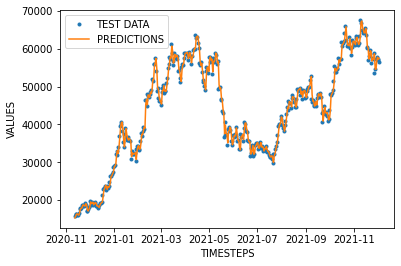

In [30]:
plot_timeseries(timesteps[-int(len(test_hor)):],test_hor,label="TEST DATA")
plot_timeseries(timesteps[-int(len(test_hor)):],pred1,format = '-',label="PREDICTIONS")

# MODEL2

In [31]:
#preparing the data
windows,horizons = make_windows(30,1,prices)
windows.shape,horizons.shape

((2557, 30), (2557,))

In [32]:
train_win = windows[:int(len(windows)*0.8)]
train_hor = horizons[:int(len(windows)*0.8)]
test_win = windows[int(len(windows)*0.8):]
test_hor = horizons[int(len(windows)*0.8):]
len(train_win)

2045

In [33]:
# window = 30, horizon = 1
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(1,activation="linear")
],name="model2")
model2.compile(optimizer = tf.keras.optimizers.Adam(), loss = "mae", metrics=["mae", "mse"])
history2 = model2.fit(train_win, 
                    train_hor, 
                    epochs = 100,
                    batch_size = 128,
                    validation_data = (test_win,test_hor),
                    callbacks = [create_model_checkpoint("model2.ckpt")])

Epoch 1/100
16/16 [==============================] - 1s 29ms/step - loss: 2265.8096 - mae: 2265.8096 - mse: 15660358.0000 - val_loss: 4915.5635 - val_mae: 4915.5635 - val_mse: 48315872.0000
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 758.6044 - mae: 758.6044 - mse: 1855104.8750 - val_loss: 5126.7427 - val_mae: 5126.7427 - val_mse: 52544340.0000
Epoch 3/100
16/16 [==============================] - 0s 23ms/step - loss: 602.2100 - mae: 602.2100 - mse: 1328852.2500 - val_loss: 3567.5144 - val_mae: 3567.5144 - val_mse: 25155268.0000
Epoch 4/100
16/16 [==============================] - 0s 24ms/step - loss: 443.4994 - mae: 443.4994 - mse: 771452.7500 - val_loss: 3324.5388 - val_mae: 3324.5388 - val_mse: 19574594.0000
Epoch 5/100
16/16 [==============================] - 0s 23ms/step - loss: 352.6012 - mae: 352.6012 - mse: 488376.0625 - val_loss: 2313.2388 - val_mae: 2313.2388 - val_mse: 10638668.0000
Epoch 6/100
16/16 [==============================] - 0s 23ms/step

Epoch 33/100
16/16 [==============================] - 0s 23ms/step - loss: 184.2105 - mae: 184.2105 - mse: 128563.1406 - val_loss: 1251.4883 - val_mae: 1251.4883 - val_mse: 3337568.0000
Epoch 34/100
16/16 [==============================] - 0s 23ms/step - loss: 160.7511 - mae: 160.7511 - mse: 110298.2188 - val_loss: 1228.6995 - val_mae: 1228.6995 - val_mse: 3215351.2500
Epoch 35/100
16/16 [==============================] - 0s 23ms/step - loss: 156.8054 - mae: 156.8054 - mse: 106921.0156 - val_loss: 1224.4503 - val_mae: 1224.4503 - val_mse: 3198977.5000
Epoch 36/100
16/16 [==============================] - 0s 23ms/step - loss: 159.2620 - mae: 159.2620 - mse: 109931.2109 - val_loss: 1221.4298 - val_mae: 1221.4298 - val_mse: 3182248.2500
Epoch 37/100
16/16 [==============================] - 0s 4ms/step - loss: 169.4020 - mae: 169.4020 - mse: 117510.5625 - val_loss: 1402.4137 - val_mae: 1402.4137 - val_mse: 3853208.0000
Epoch 38/100
16/16 [==============================] - 0s 4ms/step - los

Epoch 69/100
16/16 [==============================] - 0s 4ms/step - loss: 152.8704 - mae: 152.8704 - mse: 98467.2891 - val_loss: 1168.5181 - val_mae: 1168.5181 - val_mse: 2931277.0000
Epoch 70/100
16/16 [==============================] - 0s 4ms/step - loss: 149.4373 - mae: 149.4373 - mse: 97892.6328 - val_loss: 1475.4193 - val_mae: 1475.4193 - val_mse: 4358379.0000
Epoch 71/100
16/16 [==============================] - 0s 23ms/step - loss: 165.1414 - mae: 165.1414 - mse: 106002.7578 - val_loss: 1146.4534 - val_mae: 1146.4534 - val_mse: 2853412.7500
Epoch 72/100
16/16 [==============================] - 0s 4ms/step - loss: 151.3083 - mae: 151.3083 - mse: 99008.7031 - val_loss: 1202.4961 - val_mae: 1202.4961 - val_mse: 3031476.5000
Epoch 73/100
16/16 [==============================] - 0s 11ms/step - loss: 152.1765 - mae: 152.1765 - mse: 100886.1250 - val_loss: 1309.4209 - val_mae: 1309.4209 - val_mse: 3557760.5000
Epoch 74/100
16/16 [==============================] - 0s 4ms/step - loss: 17

# EVALUATING MODEL2

In [34]:
model2.evaluate(test_win,test_hor)

16/16 [==============================] - 0s 2ms/step - loss: 1247.9705 - mae: 1247.9705 - mse: 3173892.0000


[1247.970458984375, 1247.970458984375, 3173892.0]

In [35]:
pred2 = model2.predict(test_win)
pred2 = tf.squeeze(pred2)

In [36]:
model2_report = model_report(test_hor,pred2)
model2_report

{'MEAN ABSOLUTE ERROR': 1247.9705,
 'MEAN SQUARED ERROR': 3173892.0,
 'ROOT MEAN SQUARED ERROR': 1781.542,
 'MEAN ABSOLUTE PERCENTAGE ERROR': 3.3481154}

# PLOTTING THE PREDICTIONS OF MODEL2

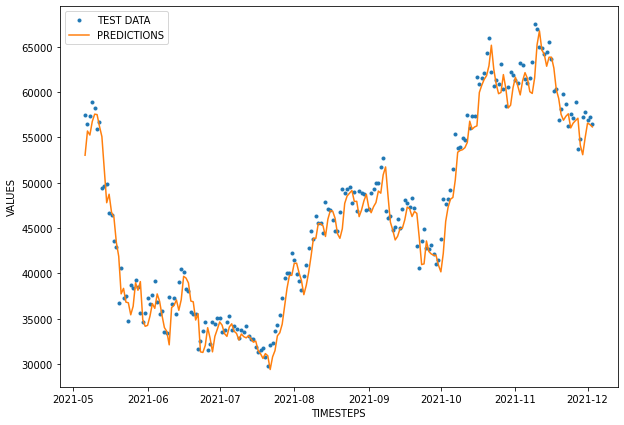

In [37]:
plt.figure(figsize=(10,7))
plot_timeseries(timesteps[-int(len(test_win)):], test_hor,label="TEST DATA",start=300)
plot_timeseries(timesteps[-int(len(test_win)):], pred2, format='-', label="PREDICTIONS",start=300)

# MODEL 3

In [38]:
# preparing the data
windows,horizons = make_windows(30,7,prices)
windows.shape,horizons.shape 

((2551, 30), (2551, 7))

In [39]:
# splitting into train and test data
train_win = windows[:int(len(windows)*0.8)][:]
train_hor = horizons[:int(len(windows)*0.8)][:]
test_win = windows[int(len(windows)*0.8):][:]
test_hor = horizons[int(len(windows)*0.8):][:]
train_win.shape,test_win.shape,train_hor.shape,test_hor.shape

((2040, 30), (511, 30), (2040, 7), (511, 7))

In [40]:
# building model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(7)
],name="model3")
model3.compile(optimizer = tf.keras.optimizers.Adam(), loss = "mae", metrics=["mae", "mse"])
history3 = model3.fit(train_win, 
                    train_hor, 
                    epochs = 100,
                    batch_size = 128,
                    validation_data = (test_win,test_hor),
                    callbacks = [create_model_checkpoint("model3.ckpt")])

Epoch 1/100
16/16 [==============================] - 1s 29ms/step - loss: 2772.6780 - mae: 2772.6780 - mse: 25159018.0000 - val_loss: 9750.0039 - val_mae: 9750.0039 - val_mse: 279465696.0000
Epoch 2/100
16/16 [==============================] - 0s 24ms/step - loss: 795.8112 - mae: 795.8112 - mse: 2584786.0000 - val_loss: 4851.4346 - val_mae: 4851.4346 - val_mse: 48702684.0000
Epoch 3/100
16/16 [==============================] - 0s 23ms/step - loss: 518.1537 - mae: 518.1537 - mse: 1023233.1875 - val_loss: 3750.1208 - val_mae: 3750.1208 - val_mse: 28786302.0000
Epoch 4/100
16/16 [==============================] - 0s 24ms/step - loss: 449.2865 - mae: 449.2865 - mse: 785346.4375 - val_loss: 3289.0754 - val_mae: 3289.0754 - val_mse: 22551414.0000
Epoch 5/100
16/16 [==============================] - 0s 24ms/step - loss: 422.0651 - mae: 422.0651 - mse: 709638.0000 - val_loss: 3231.2822 - val_mae: 3231.2822 - val_mse: 21829580.0000
Epoch 6/100
16/16 [==============================] - 0s 24ms/st

16/16 [==============================] - 0s 4ms/step - loss: 318.2491 - mae: 318.2491 - mse: 427780.3438 - val_loss: 2519.9170 - val_mae: 2519.9170 - val_mse: 13606207.0000
Epoch 30/100
16/16 [==============================] - 0s 4ms/step - loss: 315.6877 - mae: 315.6877 - mse: 419905.6250 - val_loss: 2501.7117 - val_mae: 2501.7117 - val_mse: 13476185.0000
Epoch 31/100
16/16 [==============================] - 0s 5ms/step - loss: 313.8221 - mae: 313.8221 - mse: 416444.5000 - val_loss: 2504.7009 - val_mae: 2504.7009 - val_mse: 13377692.0000
Epoch 32/100
16/16 [==============================] - 0s 22ms/step - loss: 314.4783 - mae: 314.4783 - mse: 416633.5000 - val_loss: 2444.0632 - val_mae: 2444.0632 - val_mse: 13330236.0000
Epoch 33/100
16/16 [==============================] - 0s 5ms/step - loss: 319.5028 - mae: 319.5028 - mse: 418836.0625 - val_loss: 2517.9036 - val_mae: 2517.9036 - val_mse: 13638943.0000
Epoch 34/100
16/16 [==============================] - 0s 24ms/step - loss: 316.678

16/16 [==============================] - 0s 23ms/step - loss: 296.9988 - mae: 296.9988 - mse: 370106.8125 - val_loss: 2289.7974 - val_mae: 2289.7974 - val_mse: 11541330.0000
Epoch 67/100
16/16 [==============================] - 0s 4ms/step - loss: 294.6481 - mae: 294.6481 - mse: 365707.4062 - val_loss: 2328.7566 - val_mae: 2328.7566 - val_mse: 11724354.0000
Epoch 68/100
16/16 [==============================] - 0s 5ms/step - loss: 294.5917 - mae: 294.5917 - mse: 365878.6250 - val_loss: 2301.4031 - val_mae: 2301.4031 - val_mse: 11516634.0000
Epoch 69/100
16/16 [==============================] - 0s 4ms/step - loss: 298.7109 - mae: 298.7109 - mse: 373056.1875 - val_loss: 2474.0303 - val_mae: 2474.0303 - val_mse: 12593930.0000
Epoch 70/100
16/16 [==============================] - 0s 5ms/step - loss: 298.6616 - mae: 298.6616 - mse: 369194.1562 - val_loss: 2358.7043 - val_mae: 2358.7043 - val_mse: 11920747.0000
Epoch 71/100
16/16 [==============================] - 0s 5ms/step - loss: 293.4753

In [41]:
# loading the best performing model
model3 = tf.keras.models.load_model("model3.ckpt")

# EVALUATING MODEL3

In [42]:
model3.evaluate(test_win,test_hor)

16/16 [==============================] - 0s 2ms/step - loss: 2220.9060 - mae: 2220.9060 - mse: 10973673.0000


[2220.906005859375, 2220.906005859375, 10973673.0]

In [43]:
pred3 = tf.squeeze(model3.predict(test_win)).numpy()
pred3.shape

(511, 7)

In [44]:
model3_report = model_report(test_hor,pred3)
model3_report

{'MEAN ABSOLUTE ERROR': 2220.9062,
 'MEAN SQUARED ERROR': 10973673.0,
 'ROOT MEAN SQUARED ERROR': 3312.6536,
 'MEAN ABSOLUTE PERCENTAGE ERROR': 5.845532}

# MODEL4

In [45]:
# preparing the data
windows, horizons = make_windows(7,1,prices)
windows.shape, horizons.shape

((2580, 7), (2580,))

In [46]:
# splitting into train and test data
train_win = windows[:int(len(windows)*0.8)]
train_hor = horizons[:int(len(windows)*0.8)]
test_win = windows[int(len(windows)*0.8):]
test_hor = horizons[int(len(windows)*0.8):]
train_win.shape,test_win.shape,train_hor.shape,test_hor.shape

((2064, 7), (516, 7), (2064,), (516,))

In [47]:
# building model
# data should be in the form [batch_size, time_steps, ndims]
model4 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x : tf.expand_dims(x,axis=1)),
    tf.keras.layers.Conv1D(128, kernel_size = 5, padding = "causal", activation = "relu"),
    tf.keras.layers.Dense(1) #changing the default activation function
],name = "model4")
model4.compile(loss = "mae", optimizer = tf.keras.optimizers.Adam(), metrics = ["mae","mse"])
history4 = model4.fit(train_win,
                      train_hor,
                      batch_size = 128,
                      epochs = 100,
                      validation_data = (test_win,test_hor),
                      callbacks = [create_model_checkpoint("model4.ckpt")])

Epoch 1/100
17/17 [==============================] - 9s 46ms/step - loss: 3796.1934 - mae: 3796.1934 - mse: 25116348.0000 - val_loss: 19256.7480 - val_mae: 19256.7480 - val_mse: 540117248.0000
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 3780.3689 - mae: 3780.3689 - mse: 24981110.0000 - val_loss: 21140.1895 - val_mae: 21140.1895 - val_mse: 630923392.0000
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 3780.2268 - mae: 3780.2268 - mse: 25038508.0000 - val_loss: 20061.2402 - val_mae: 20061.2402 - val_mse: 577846464.0000
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 3782.0107 - mae: 3782.0107 - mse: 24769900.0000 - val_loss: 20285.6426 - val_mae: 20285.6426 - val_mse: 588660224.0000
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 3778.4988 - mae: 3778.4988 - mse: 24852334.0000 - val_loss: 20044.3574 - val_mae: 20044.3574 - val_mse: 577037248.0000
Epoch 6/100
17/17 [====================

Epoch 42/100
17/17 [==============================] - 0s 5ms/step - loss: 3775.0254 - mae: 3775.0254 - mse: 24771456.0000 - val_loss: 21218.4277 - val_mae: 21218.4277 - val_mse: 634897920.0000
Epoch 43/100
17/17 [==============================] - 0s 5ms/step - loss: 3782.7063 - mae: 3782.7063 - mse: 25079290.0000 - val_loss: 19249.3633 - val_mae: 19249.3633 - val_mse: 539653760.0000
Epoch 44/100
17/17 [==============================] - 0s 5ms/step - loss: 3776.0859 - mae: 3776.0859 - mse: 24738436.0000 - val_loss: 21398.4609 - val_mae: 21398.4609 - val_mse: 644068800.0000
Epoch 45/100
17/17 [==============================] - 0s 5ms/step - loss: 3772.8691 - mae: 3772.8691 - mse: 24763298.0000 - val_loss: 20244.6484 - val_mae: 20244.6484 - val_mse: 586638848.0000
Epoch 46/100
17/17 [==============================] - 0s 5ms/step - loss: 3777.4995 - mae: 3777.4995 - mse: 25022362.0000 - val_loss: 19073.1914 - val_mae: 19073.1914 - val_mse: 531584768.0000
Epoch 47/100
17/17 [===============

17/17 [==============================] - 0s 5ms/step - loss: 3774.6243 - mae: 3774.6243 - mse: 24734084.0000 - val_loss: 20870.6719 - val_mae: 20870.6719 - val_mse: 617412416.0000
Epoch 85/100
17/17 [==============================] - 0s 5ms/step - loss: 3766.9968 - mae: 3766.9968 - mse: 24924376.0000 - val_loss: 19606.0293 - val_mae: 19606.0293 - val_mse: 556201216.0000
Epoch 86/100
17/17 [==============================] - 0s 6ms/step - loss: 3773.1680 - mae: 3773.1680 - mse: 24608784.0000 - val_loss: 20851.3301 - val_mae: 20851.3301 - val_mse: 616448320.0000
Epoch 87/100
17/17 [==============================] - 0s 6ms/step - loss: 3780.7136 - mae: 3780.7136 - mse: 25077718.0000 - val_loss: 19943.8926 - val_mae: 19943.8926 - val_mse: 572182464.0000
Epoch 88/100
17/17 [==============================] - 0s 5ms/step - loss: 3777.0591 - mae: 3777.0591 - mse: 24796542.0000 - val_loss: 20519.7930 - val_mae: 20519.7930 - val_mse: 600051456.0000
Epoch 89/100
17/17 [============================

# EVALUATING MODEL4

In [48]:
model4 = tf.keras.models.load_model("model4.ckpt")

In [49]:
model4.evaluate(test_win,test_hor)

17/17 [==============================] - 0s 2ms/step - loss: 18642.4316 - mae: 18642.4316 - mse: 448359840.0000


[18642.431640625, 18642.431640625, 448359840.0]

In [50]:
pred4 = tf.squeeze(model4.predict(test_win)).numpy()
model4_report = model_report(test_hor,pred4)
model4_report

{'MEAN ABSOLUTE ERROR': 18642.43,
 'MEAN SQUARED ERROR': 439573340.0,
 'ROOT MEAN SQUARED ERROR': 20966.004,
 'MEAN ABSOLUTE PERCENTAGE ERROR': 52.35763}

# PLOTTING THE PREDICTIONS OF MODEL4

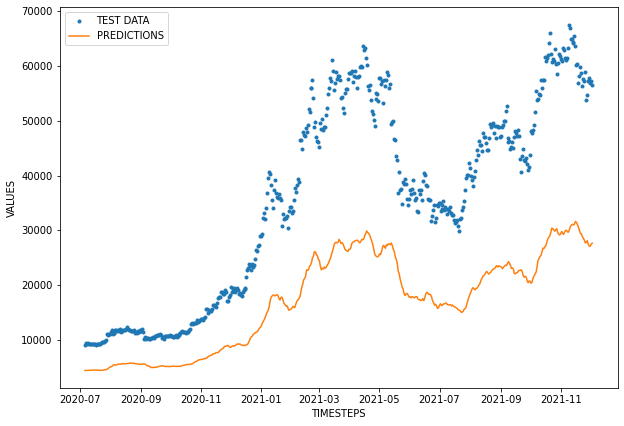

In [51]:
plt.figure(figsize=(10,7))
plot_timeseries(timesteps[-int(len(test_win)):],test_hor,label="TEST DATA")
plot_timeseries(timesteps[-int(len(test_win)):],pred4,format='-',label="PREDICTIONS")

# MODEL5

In [52]:
# data is same as above
# input also has to be in the same form
model5 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x : tf.expand_dims(x,axis=1)),
    tf.keras.layers.LSTM(128,activation = "relu"),
    tf.keras.layers.Dense(1)
])
model5.compile(loss="mae",optimizer = tf.keras.optimizers.Adam(), metrics=["mae","mse"])
history5 = model5.fit(train_win,
                      train_hor,
                      epochs = 100,
                      batch_size = 128,
                      verbose = 0,
                      validation_data = (test_win,test_hor),
                      callbacks = [create_model_checkpoint("model5.ckpt")])

INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


INFO:tensorflow:Assets written to: model5.ckpt\assets


# EVALUATING MODEL5

In [53]:
model5 = tf.keras.models.load_model("model5.ckpt")

In [54]:
model5.evaluate(test_win, test_hor)

17/17 [==============================] - 0s 3ms/step - loss: 1114.3325 - mae: 1114.3325 - mse: 2743902.7500


[1114.33251953125, 1114.33251953125, 2743902.75]

In [55]:
pred5 = tf.squeeze(model5.predict(test_win)).numpy()
pred5[:10]

array([9112.25 , 9088.219, 9251.534, 9254.448, 9389.934, 9308.558,
       9301.402, 9263.414, 9273.714, 9250.396], dtype=float32)

In [56]:
model5_report = model_report(test_hor,pred5)
model5_report

{'MEAN ABSOLUTE ERROR': 1114.3326,
 'MEAN SQUARED ERROR': 2743902.8,
 'ROOT MEAN SQUARED ERROR': 1656.473,
 'MEAN ABSOLUTE PERCENTAGE ERROR': 2.9406936}

# PLOTTING THE PREDICTIOONS OF MODEL5

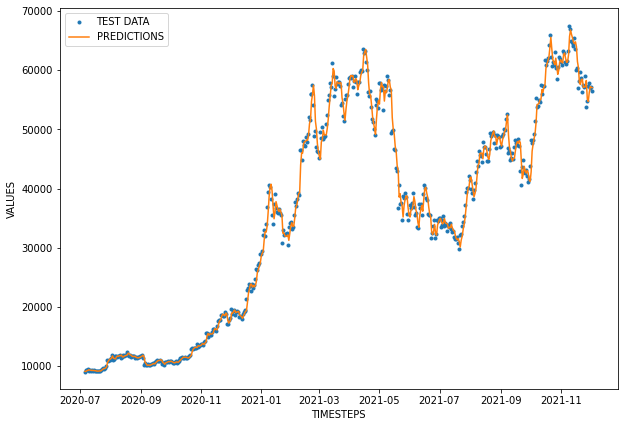

In [57]:
plt.figure(figsize=(10,7))
plot_timeseries(timesteps[-int(len(test_hor)):],test_hor,label ="TEST DATA")
plot_timeseries(timesteps[-int(len(test_hor)):],pred5,format = '-',label ="PREDICTIONS")

# COMPARING RESULTS OF ALL UNIVARIATE TIME SERIES MODELS

Text(0.5, 1.0, 'COMPARISON OF MAE OF ALL MODELS')

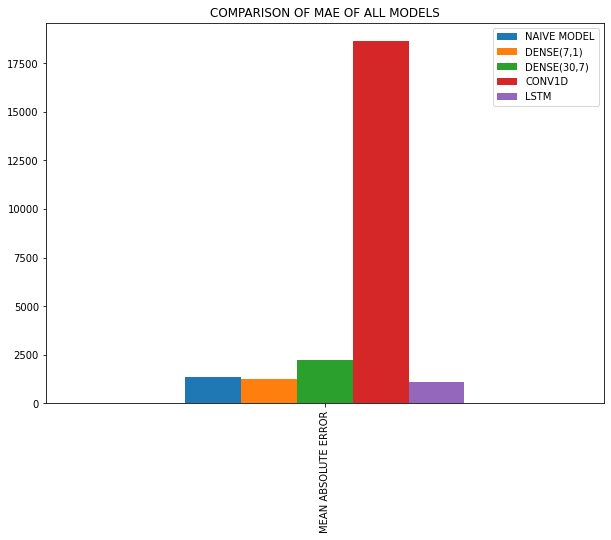

In [58]:
pd.DataFrame({
    "NAIVE MODEL":model1_report["MEAN ABSOLUTE ERROR"],
    "DENSE(7,1)":model2_report["MEAN ABSOLUTE ERROR"],
    "DENSE(30,7)":model3_report["MEAN ABSOLUTE ERROR"],
    "CONV1D":model4_report["MEAN ABSOLUTE ERROR"],
    "LSTM":model5_report["MEAN ABSOLUTE ERROR"]
},index = ["MEAN ABSOLUTE ERROR"]).plot(kind = "bar",figsize=(10,7))
plt.title("COMPARISON OF MAE OF ALL MODELS")

# MULTIVARIATE TIME SERIES
* PREPARING THE DATA
* TRAINING A DENSE MODEL

# PREPARING THE DATA

In [59]:
# block reward data is going to be the second variable
block_reward1 = 50
block_reward2 = 25
block_reward3 = 12.25
block_reward4 = 6.25

In [60]:
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [61]:
block_reward_days2 = (block_reward_3_datetime - df_cp.index[0]).days
block_reward_days3 = (block_reward_4_datetime - df_cp.index[0]).days
block_reward_days2, block_reward_days3
# this means that from day 0 to 613 a block reward of 25 was given, from 613 to 2015 
# block reward of 12.5 was given and from 2015 to the end a block reward of 6.25 was given

(613, 2015)

In [88]:
df_cp_block = df_cp.copy()
df_cp_block["block reward"] = None
df_cp_block.iloc[:block_reward_days2,-1] = 25
df_cp_block.iloc[block_reward_days2:block_reward_days3,-1] = 12.5
df_cp_block.iloc[block_reward_days3:,-1] = 6.25
df_cp_block

,Price,block reward
Date,,
2014-11-04,324.467934,25
2014-11-05,328.644408,25
2014-11-06,337.921358,25
2014-11-07,348.992860,25
2014-11-08,341.459753,25
...,...,...
2021-11-29,57303.185972,6.25
2021-11-30,57834.357549,6.25
2021-12-01,56973.182042,6.25


# PLOTTING THE DATA

<AxesSubplot:xlabel='Date'>

<Figure size 720x504 with 0 Axes>

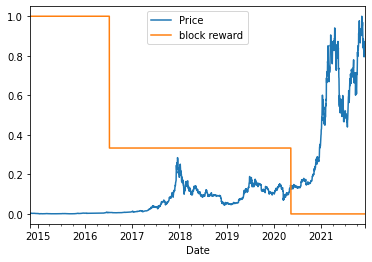

In [89]:
from sklearn.preprocessing import minmax_scale
plt.figure(figsize=(10,7))
df_cp_block_scaled = pd.DataFrame(minmax_scale(df_cp_block[["Price","block reward"]]),
                                  columns = df_cp_block.columns,
                                  index = df_cp_block.index)
df_cp_block_scaled.plot()

# SPLITTING IN WINDOWS AND HORIZONS

In [90]:
window_size = 7
horizon = 1
for i in range(window_size):
    df_cp_block[f'Prices {i}'] = df_cp_block["Price"].shift(periods = i)
df_cp_block.head(10)

,Price,block reward,Prices 0,Prices 1,Prices 2,Prices 3,Prices 4,Prices 5,Prices 6
Date,,,,,,,,,
2014-11-04,324.467934,25,324.467934,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-05,328.644408,25,328.644408,324.467934,NaN,NaN,NaN,NaN,NaN
2014-11-06,337.921358,25,337.921358,328.644408,324.467934,NaN,NaN,NaN,NaN
2014-11-07,348.992860,25,348.992860,337.921358,328.644408,324.467934,NaN,NaN,NaN
2014-11-08,341.459753,25,341.459753,348.992860,337.921358,328.644408,324.467934,NaN,NaN
2014-11-09,344.745289,25,344.745289,341.459753,348.992860,337.921358,328.644408,324.467934,NaN
2014-11-10,357.239982,25,357.239982,344.745289,341.459753,348.992860,337.921358,328.644408,324.467934
2014-11-11,371.116917,25,371.116917,357.239982,344.745289,341.459753,348.992860,337.921358,328.644408
2014-11-12,366.664633,25,366.664633,371.116917,357.239982,344.745289,341.459753,348.992860,337.921358


In [91]:
x = df_cp_block.dropna().drop(["Price"],axis=1).astype(np.float32)
y = df_cp_block.dropna()["Price"].astype(np.float32)

In [94]:
#splitting into training and testing data
train_win = x[:int(len(x)*0.8)][:]
test_win = x[int(len(x)*0.8):][:]
train_hor = y[:int(len(x)*0.8)][:]
test_hor = y[int(len(x)*0.8):][:]
train_win.shape,train_hor.shape,test_win.shape,test_hor.shape

((2064, 8), (2064,), (517, 8), (517,))

# MODEL6

In [98]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(1)
],name="model6")
model6.compile(loss = "mae", optimizer = tf.keras.optimizers.Adam(), metrics = ["mae","mse"])
history6 = model6.fit(train_win,
                      train_hor,
                      epochs = 100,
                      validation_data = (test_win,test_hor),
                       batch_size = 128,
                      callbacks = [create_model_checkpoint("model6")])

Epoch 1/100
16/17 [===========================>..] - ETA: 0s - loss: 2414.4944 - mae: 2414.4944 - mse: 14552424.0000INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 1s 27ms/step - loss: 2398.9592 - mae: 2398.9592 - mse: 14444698.0000 - val_loss: 2888.7822 - val_mae: 2888.7822 - val_mse: 14826768.0000
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 462.9113 - mae: 462.9113 - mse: 599183.0000 - val_loss: 2971.6338 - val_mae: 2971.6338 - val_mse: 13809322.0000
Epoch 3/100
17/17 [==============================] - ETA: 0s - loss: 223.1998 - mae: 223.1998 - mse: 177010.5938INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 23ms/step - loss: 223.1998 - mae: 223.1998 - mse: 177010.5938 - val_loss: 1506.7377 - val_mae: 1506.7377 - val_mse: 4386474.0000
Epoch 4/100
16/17 [===========================>..] - ETA: 0s - loss: 180.6263 - mae: 180.6263 - mse: 136640.0000INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 24ms/step - loss: 181.1416 - mae: 181.1416 - mse: 137079.2500 - val_loss: 1350.7345 - val_mae: 1350.7345 - val_mse: 3689753.5000
Epoch 5/100
17/17 [==============================] - ETA: 0s - loss: 171.3260 - mae: 171.3260 - mse: 125694.2734INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 23ms/step - loss: 171.3260 - mae: 171.3260 - mse: 125694.2734 - val_loss: 1291.3738 - val_mae: 1291.3738 - val_mse: 3437019.2500
Epoch 6/100
15/17 [=========================>....] - ETA: 0s - loss: 168.7056 - mae: 168.7056 - mse: 119857.2500INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 25ms/step - loss: 166.9896 - mae: 166.9896 - mse: 117659.1094 - val_loss: 1290.5530 - val_mae: 1290.5530 - val_mse: 3315105.7500
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 180.0625 - mae: 180.0625 - mse: 124689.5312 - val_loss: 1343.4624 - val_mae: 1343.4624 - val_mse: 3456049.7500
Epoch 8/100
17/17 [==============================] - ETA: 0s - loss: 161.4871 - mae: 161.4871 - mse: 106929.1875INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 24ms/step - loss: 161.4871 - mae: 161.4871 - mse: 106929.1875 - val_loss: 1165.9263 - val_mae: 1165.9263 - val_mse: 2915797.0000
Epoch 9/100
17/17 [==============================] - ETA: 0s - loss: 144.0855 - mae: 144.0855 - mse: 89803.1953INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 24ms/step - loss: 144.0855 - mae: 144.0855 - mse: 89803.1953 - val_loss: 1071.2870 - val_mae: 1071.2870 - val_mse: 2414502.5000
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 140.4917 - mae: 140.4917 - mse: 84786.7500 - val_loss: 1217.3114 - val_mae: 1217.3114 - val_mse: 2782215.0000
Epoch 11/100
17/17 [==============================] - ETA: 0s - loss: 131.9159 - mae: 131.9159 - mse: 74338.6172INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 24ms/step - loss: 131.9159 - mae: 131.9159 - mse: 74338.6172 - val_loss: 959.2737 - val_mae: 959.2737 - val_mse: 1941835.2500
Epoch 12/100
17/17 [==============================] - ETA: 0s - loss: 122.6400 - mae: 122.6400 - mse: 65868.7891INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 31ms/step - loss: 122.6400 - mae: 122.6400 - mse: 65868.7891 - val_loss: 954.7001 - val_mae: 954.7001 - val_mse: 1825383.8750
Epoch 13/100
16/17 [===========================>..] - ETA: 0s - loss: 118.0704 - mae: 118.0704 - mse: 59640.9961INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 23ms/step - loss: 118.7826 - mae: 118.7826 - mse: 60052.4883 - val_loss: 872.9857 - val_mae: 872.9857 - val_mse: 1586773.3750
Epoch 14/100
17/17 [==============================] - 0s 5ms/step - loss: 112.0688 - mae: 112.0688 - mse: 55567.3711 - val_loss: 1007.5082 - val_mae: 1007.5082 - val_mse: 1915656.0000
Epoch 15/100
15/17 [=========================>....] - ETA: 0s - loss: 110.2054 - mae: 110.2054 - mse: 51834.6602INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 24ms/step - loss: 109.9667 - mae: 109.9667 - mse: 51231.7734 - val_loss: 845.2344 - val_mae: 845.2344 - val_mse: 1557178.5000
Epoch 16/100
16/17 [===========================>..] - ETA: 0s - loss: 104.1168 - mae: 104.1168 - mse: 46856.8789INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 24ms/step - loss: 104.8987 - mae: 104.8987 - mse: 47034.5312 - val_loss: 753.8067 - val_mae: 753.8067 - val_mse: 1202962.5000
Epoch 17/100
16/17 [===========================>..] - ETA: 0s - loss: 102.7586 - mae: 102.7586 - mse: 44415.3203INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 23ms/step - loss: 102.5324 - mae: 102.5324 - mse: 44181.7188 - val_loss: 716.2845 - val_mae: 716.2845 - val_mse: 1094944.2500
Epoch 18/100
17/17 [==============================] - ETA: 0s - loss: 94.2329 - mae: 94.2329 - mse: 38444.2031  INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 22ms/step - loss: 94.2329 - mae: 94.2329 - mse: 38444.2031 - val_loss: 700.3281 - val_mae: 700.3281 - val_mse: 1026900.8750
Epoch 19/100
17/17 [==============================] - 0s 4ms/step - loss: 90.2145 - mae: 90.2145 - mse: 34987.6289 - val_loss: 728.1251 - val_mae: 728.1251 - val_mse: 1145110.3750
Epoch 20/100
 1/17 [>.............................] - ETA: 0s - loss: 89.0124 - mae: 89.0124 - mse: 27071.4219INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 24ms/step - loss: 92.8885 - mae: 92.8885 - mse: 35404.5781 - val_loss: 665.9138 - val_mae: 665.9138 - val_mse: 921803.8750
Epoch 21/100
 1/17 [>.............................] - ETA: 0s - loss: 102.8765 - mae: 102.8765 - mse: 34176.0859INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 24ms/step - loss: 90.9767 - mae: 90.9767 - mse: 32624.8750 - val_loss: 609.4304 - val_mae: 609.4304 - val_mse: 798473.0000
Epoch 22/100
17/17 [==============================] - 0s 4ms/step - loss: 82.6189 - mae: 82.6189 - mse: 29612.7988 - val_loss: 686.5394 - val_mae: 686.5394 - val_mse: 939176.0000
Epoch 23/100
 1/17 [>.............................] - ETA: 0s - loss: 82.1217 - mae: 82.1217 - mse: 20042.4980INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 22ms/step - loss: 80.0756 - mae: 80.0756 - mse: 27209.2422 - val_loss: 571.8015 - val_mae: 571.8015 - val_mse: 700593.1250
Epoch 24/100
17/17 [==============================] - 0s 4ms/step - loss: 73.3010 - mae: 73.3010 - mse: 24199.5137 - val_loss: 642.6355 - val_mae: 642.6355 - val_mse: 825171.5625
Epoch 25/100
17/17 [==============================] - 0s 4ms/step - loss: 75.8719 - mae: 75.8719 - mse: 23883.5859 - val_loss: 625.9077 - val_mae: 625.9077 - val_mse: 776525.6250
Epoch 26/100
 1/17 [>.............................] - ETA: 0s - loss: 60.4457 - mae: 60.4457 - mse: 12170.6787INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 22ms/step - loss: 79.4946 - mae: 79.4946 - mse: 23455.0469 - val_loss: 496.3159 - val_mae: 496.3159 - val_mse: 536757.3750
Epoch 27/100
 1/17 [>.............................] - ETA: 0s - loss: 54.2107 - mae: 54.2107 - mse: 12459.3027INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 23ms/step - loss: 65.2371 - mae: 65.2371 - mse: 18958.1562 - val_loss: 472.4680 - val_mae: 472.4680 - val_mse: 488377.1875
Epoch 28/100
 1/17 [>.............................] - ETA: 0s - loss: 70.3879 - mae: 70.3879 - mse: 19642.9746INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 22ms/step - loss: 61.1645 - mae: 61.1645 - mse: 16605.3594 - val_loss: 451.5946 - val_mae: 451.5946 - val_mse: 445844.0000
Epoch 29/100
 1/17 [>.............................] - ETA: 0s - loss: 62.8772 - mae: 62.8772 - mse: 14706.2266INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 23ms/step - loss: 56.4518 - mae: 56.4518 - mse: 13956.7783 - val_loss: 411.3920 - val_mae: 411.3920 - val_mse: 366409.1250
Epoch 30/100
17/17 [==============================] - 0s 4ms/step - loss: 54.2339 - mae: 54.2339 - mse: 12452.3066 - val_loss: 414.6499 - val_mae: 414.6499 - val_mse: 360963.6562
Epoch 31/100
17/17 [==============================] - 0s 4ms/step - loss: 52.1122 - mae: 52.1122 - mse: 11400.2910 - val_loss: 435.1379 - val_mae: 435.1379 - val_mse: 393267.1875
Epoch 32/100
 1/17 [>.............................] - ETA: 0s - loss: 66.5264 - mae: 66.5264 - mse: 14338.2988INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 22ms/step - loss: 54.6507 - mae: 54.6507 - mse: 11313.9189 - val_loss: 337.6207 - val_mae: 337.6207 - val_mse: 254865.3906
Epoch 33/100
 1/17 [>.............................] - ETA: 0s - loss: 42.8693 - mae: 42.8693 - mse: 8529.3125INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 22ms/step - loss: 48.9328 - mae: 48.9328 - mse: 9724.2539 - val_loss: 325.5435 - val_mae: 325.5435 - val_mse: 236377.4219
Epoch 34/100
 1/17 [>.............................] - ETA: 0s - loss: 44.2489 - mae: 44.2489 - mse: 16755.1133INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 21ms/step - loss: 42.1417 - mae: 42.1417 - mse: 7860.6738 - val_loss: 310.8433 - val_mae: 310.8433 - val_mse: 213857.9531
Epoch 35/100
 1/17 [>.............................] - ETA: 0s - loss: 27.8234 - mae: 27.8234 - mse: 2796.5518INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 22ms/step - loss: 45.5452 - mae: 45.5452 - mse: 8152.7637 - val_loss: 287.5854 - val_mae: 287.5854 - val_mse: 181350.5312
Epoch 36/100
17/17 [==============================] - 0s 4ms/step - loss: 38.2436 - mae: 38.2436 - mse: 6388.7939 - val_loss: 473.9712 - val_mae: 473.9712 - val_mse: 388684.8750
Epoch 37/100
17/17 [==============================] - 0s 4ms/step - loss: 66.3542 - mae: 66.3542 - mse: 13394.2939 - val_loss: 503.1904 - val_mae: 503.1904 - val_mse: 421585.5625
Epoch 38/100
 1/17 [>.............................] - ETA: 0s - loss: 54.1653 - mae: 54.1653 - mse: 7772.8604INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 22ms/step - loss: 50.1679 - mae: 50.1679 - mse: 7943.5679 - val_loss: 267.5211 - val_mae: 267.5211 - val_mse: 152717.6094
Epoch 39/100
17/17 [==============================] - 0s 4ms/step - loss: 43.8154 - mae: 43.8154 - mse: 6677.1611 - val_loss: 289.5849 - val_mae: 289.5849 - val_mse: 172355.7656
Epoch 40/100
 1/17 [>.............................] - ETA: 0s - loss: 43.0447 - mae: 43.0447 - mse: 4987.5625INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 22ms/step - loss: 41.8397 - mae: 41.8397 - mse: 6515.5596 - val_loss: 237.4967 - val_mae: 237.4967 - val_mse: 122616.8984
Epoch 41/100
17/17 [==============================] - 0s 4ms/step - loss: 45.0299 - mae: 45.0299 - mse: 6943.6870 - val_loss: 364.1942 - val_mae: 364.1942 - val_mse: 247201.2188
Epoch 42/100
17/17 [==============================] - 0s 4ms/step - loss: 53.7415 - mae: 53.7415 - mse: 8522.0420 - val_loss: 254.0163 - val_mae: 254.0163 - val_mse: 134522.6250
Epoch 43/100
 1/17 [>.............................] - ETA: 0s - loss: 36.9110 - mae: 36.9110 - mse: 5101.7207INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 23ms/step - loss: 31.9547 - mae: 31.9547 - mse: 4283.3057 - val_loss: 225.2127 - val_mae: 225.2127 - val_mse: 107499.1484
Epoch 44/100
 1/17 [>.............................] - ETA: 0s - loss: 23.1001 - mae: 23.1001 - mse: 1682.4069INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 23ms/step - loss: 28.8989 - mae: 28.8989 - mse: 3556.6575 - val_loss: 207.3592 - val_mae: 207.3592 - val_mse: 92926.5547
Epoch 45/100
17/17 [==============================] - 0s 4ms/step - loss: 26.8552 - mae: 26.8552 - mse: 3187.0723 - val_loss: 217.1571 - val_mae: 217.1571 - val_mse: 98426.1719
Epoch 46/100
17/17 [==============================] - 0s 4ms/step - loss: 27.1415 - mae: 27.1415 - mse: 3112.4333 - val_loss: 237.1108 - val_mae: 237.1108 - val_mse: 111754.3438
Epoch 47/100
 1/17 [>.............................] - ETA: 0s - loss: 22.6875 - mae: 22.6875 - mse: 2192.5078INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 21ms/step - loss: 25.9623 - mae: 25.9623 - mse: 2736.0488 - val_loss: 190.3251 - val_mae: 190.3251 - val_mse: 76376.8359
Epoch 48/100
17/17 [==============================] - 0s 4ms/step - loss: 27.1181 - mae: 27.1181 - mse: 2788.8838 - val_loss: 214.0287 - val_mae: 214.0287 - val_mse: 91256.0078
Epoch 49/100
 1/17 [>.............................] - ETA: 0s - loss: 25.3278 - mae: 25.3278 - mse: 2488.7415INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 30ms/step - loss: 30.7439 - mae: 30.7439 - mse: 3289.8433 - val_loss: 167.3333 - val_mae: 167.3333 - val_mse: 59370.6172
Epoch 50/100
17/17 [==============================] - 0s 4ms/step - loss: 25.7021 - mae: 25.7021 - mse: 2457.7288 - val_loss: 265.1208 - val_mae: 265.1208 - val_mse: 125989.4688
Epoch 51/100
 1/17 [>.............................] - ETA: 0s - loss: 32.6562 - mae: 32.6562 - mse: 2747.3423INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 21ms/step - loss: 24.2173 - mae: 24.2173 - mse: 2210.3416 - val_loss: 155.3519 - val_mae: 155.3519 - val_mse: 50998.9023
Epoch 52/100
17/17 [==============================] - 0s 4ms/step - loss: 19.9358 - mae: 19.9358 - mse: 1686.0596 - val_loss: 190.1256 - val_mae: 190.1256 - val_mse: 70036.2031
Epoch 53/100
17/17 [==============================] - 0s 4ms/step - loss: 30.9896 - mae: 30.9896 - mse: 3099.6013 - val_loss: 390.8836 - val_mae: 390.8836 - val_mse: 229853.2656
Epoch 54/100
17/17 [==============================] - 0s 4ms/step - loss: 29.1670 - mae: 29.1670 - mse: 2694.5137 - val_loss: 265.5331 - val_mae: 265.5331 - val_mse: 119090.9062
Epoch 55/100
17/17 [==============================] - 0s 4ms/step - loss: 22.6812 - mae: 22.6812 - mse: 1810.0159 - val_loss: 194.1996 - val_mae: 194.1996 - val_mse: 69905.7266
Epoch 56/100
 1/17 [>.............................] - ETA: 0s - loss: 23.6083 - mae: 23.6083 - mse: 1943.8112INFO:tensorflow:

INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 22ms/step - loss: 18.2462 - mae: 18.2462 - mse: 1344.2902 - val_loss: 125.0756 - val_mae: 125.0756 - val_mse: 32817.3789
Epoch 57/100
17/17 [==============================] - 0s 4ms/step - loss: 25.4557 - mae: 25.4557 - mse: 2065.7380 - val_loss: 191.3081 - val_mae: 191.3081 - val_mse: 65693.8047
Epoch 58/100
17/17 [==============================] - 0s 4ms/step - loss: 27.4201 - mae: 27.4201 - mse: 2323.6895 - val_loss: 141.8403 - val_mae: 141.8403 - val_mse: 39815.5156
Epoch 59/100
17/17 [==============================] - 0s 4ms/step - loss: 27.2303 - mae: 27.2303 - mse: 2390.2766 - val_loss: 481.8388 - val_mae: 481.8388 - val_mse: 316661.8125
Epoch 60/100
17/17 [==============================] - 0s 4ms/step - loss: 72.5192 - mae: 72.5192 - mse: 13455.9971 - val_loss: 1077.3325 - val_mae: 1077.3325 - val_mse: 1494871.5000
Epoch 61/100
17/17 [==============================] - 0s 4ms/step - loss: 74.3729 - mae: 74.3729 - mse: 15792.7393 - val_

INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 23ms/step - loss: 26.7145 - mae: 26.7145 - mse: 2138.7263 - val_loss: 121.4414 - val_mae: 121.4414 - val_mse: 29497.4258
Epoch 63/100
17/17 [==============================] - 0s 4ms/step - loss: 23.6705 - mae: 23.6705 - mse: 1793.1595 - val_loss: 125.6214 - val_mae: 125.6214 - val_mse: 30939.9414
Epoch 64/100
17/17 [==============================] - 0s 4ms/step - loss: 21.2102 - mae: 21.2102 - mse: 1578.3828 - val_loss: 474.7516 - val_mae: 474.7516 - val_mse: 305783.5625
Epoch 65/100
17/17 [==============================] - 0s 4ms/step - loss: 47.2118 - mae: 47.2118 - mse: 5862.7046 - val_loss: 448.2853 - val_mae: 448.2853 - val_mse: 274146.3438
Epoch 66/100
17/17 [==============================] - 0s 4ms/step - loss: 28.0450 - mae: 28.0450 - mse: 2374.1392 - val_loss: 330.9438 - val_mae: 330.9438 - val_mse: 156699.5000
Epoch 67/100
 1/17 [>.............................] - ETA: 0s - loss: 40.5035 - mae: 40.5035 - mse: 4719.3857INFO:tensorflow

INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 23ms/step - loss: 30.5812 - mae: 30.5812 - mse: 2551.3953 - val_loss: 99.0745 - val_mae: 99.0745 - val_mse: 19895.2188
Epoch 68/100
 1/17 [>.............................] - ETA: 0s - loss: 13.4552 - mae: 13.4552 - mse: 584.4015INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 22ms/step - loss: 43.2664 - mae: 43.2664 - mse: 4836.5337 - val_loss: 91.6059 - val_mae: 91.6059 - val_mse: 17580.4961
Epoch 69/100
17/17 [==============================] - 0s 4ms/step - loss: 16.1289 - mae: 16.1289 - mse: 904.8958 - val_loss: 155.4846 - val_mae: 155.4846 - val_mse: 41712.2930
Epoch 70/100
17/17 [==============================] - 0s 4ms/step - loss: 18.7566 - mae: 18.7566 - mse: 1152.1781 - val_loss: 327.4518 - val_mae: 327.4518 - val_mse: 148223.9844
Epoch 71/100
17/17 [==============================] - 0s 4ms/step - loss: 31.9570 - mae: 31.9570 - mse: 2643.3230 - val_loss: 208.4242 - val_mae: 208.4242 - val_mse: 66500.4453
Epoch 72/100
17/17 [==============================] - 0s 4ms/step - loss: 25.6955 - mae: 25.6955 - mse: 1784.7192 - val_loss: 347.4318 - val_mae: 347.4318 - val_mse: 165002.6719
Epoch 73/100
17/17 [==============================] - 0s 4ms/step - loss: 46.1469 - mae: 46.1469 - mse: 4911.4688 - val_loss: 47

INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 22ms/step - loss: 23.3337 - mae: 23.3337 - mse: 1461.2312 - val_loss: 77.7691 - val_mae: 77.7691 - val_mse: 12348.7139
Epoch 77/100
 1/17 [>.............................] - ETA: 0s - loss: 11.6459 - mae: 11.6459 - mse: 776.5244INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 22ms/step - loss: 16.3297 - mae: 16.3297 - mse: 954.6659 - val_loss: 70.3911 - val_mae: 70.3911 - val_mse: 10317.1191
Epoch 78/100
17/17 [==============================] - 0s 4ms/step - loss: 20.4601 - mae: 20.4601 - mse: 1170.4092 - val_loss: 194.3378 - val_mae: 194.3378 - val_mse: 56054.6250
Epoch 79/100
17/17 [==============================] - 0s 4ms/step - loss: 36.5473 - mae: 36.5473 - mse: 3494.3633 - val_loss: 227.6997 - val_mae: 227.6997 - val_mse: 73811.3438
Epoch 80/100
17/17 [==============================] - 0s 4ms/step - loss: 44.2366 - mae: 44.2366 - mse: 4414.2656 - val_loss: 247.8554 - val_mae: 247.8554 - val_mse: 86111.6328
Epoch 81/100
17/17 [==============================] - 0s 4ms/step - loss: 55.2301 - mae: 55.2301 - mse: 7585.1714 - val_loss: 640.4884 - val_mae: 640.4884 - val_mse: 526512.4375
Epoch 82/100
17/17 [==============================] - 0s 4ms/step - loss: 43.6213 - mae: 43.6213 - mse: 4569.7485 - val_loss: 304

INFO:tensorflow:Assets written to: model6\assets


17/17 [==============================] - 0s 22ms/step - loss: 18.3229 - mae: 18.3229 - mse: 889.8119 - val_loss: 47.4178 - val_mae: 47.4178 - val_mse: 4723.3721
Epoch 96/100
17/17 [==============================] - 0s 4ms/step - loss: 21.2838 - mae: 21.2838 - mse: 1562.0544 - val_loss: 480.0083 - val_mae: 480.0083 - val_mse: 295880.9375
Epoch 97/100
17/17 [==============================] - 0s 4ms/step - loss: 47.8921 - mae: 47.8921 - mse: 5391.7397 - val_loss: 272.7986 - val_mae: 272.7986 - val_mse: 97904.8594
Epoch 98/100
17/17 [==============================] - 0s 4ms/step - loss: 36.6617 - mae: 36.6617 - mse: 3064.6594 - val_loss: 407.1646 - val_mae: 407.1646 - val_mse: 213028.4375
Epoch 99/100
17/17 [==============================] - 0s 4ms/step - loss: 54.7281 - mae: 54.7281 - mse: 7108.9712 - val_loss: 152.5401 - val_mae: 152.5401 - val_mse: 33395.8242
Epoch 100/100
17/17 [==============================] - 0s 4ms/step - loss: 38.7336 - mae: 38.7336 - mse: 3817.3477 - val_loss: 17

# EVALUATING MODEL6

In [99]:
model6 = tf.keras.models.load_model("model6")

In [100]:
model6.evaluate(test_win, test_hor)

17/17 [==============================] - 0s 2ms/step - loss: 47.4177 - mae: 47.4177 - mse: 4723.3428


[47.41765213012695, 47.41765213012695, 4723.3427734375]

In [101]:
pred6 = tf.squeeze(model6.predict(test_win)).numpy()
model6_report = model_report(test_hor, pred6)
model6_report

{'MEAN ABSOLUTE ERROR': 47.417652,
 'MEAN SQUARED ERROR': 4723.3423,
 'ROOT MEAN SQUARED ERROR': 68.72658,
 'MEAN ABSOLUTE PERCENTAGE ERROR': 0.12513582}

# PLOTTING THE PREDICTIONS OF MODEL6

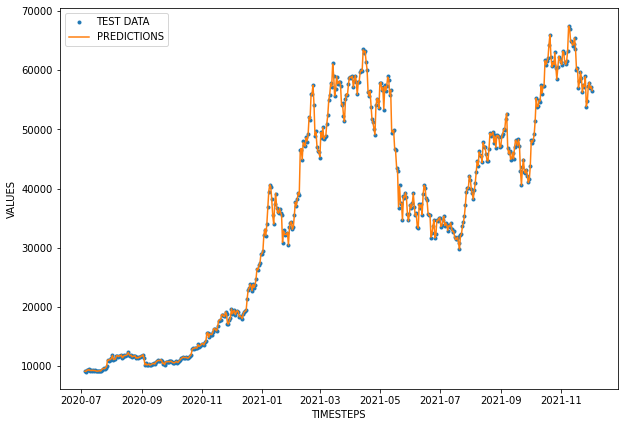

In [114]:
plt.figure(figsize=(10,7))
plot_timeseries(timesteps[-int(len(test_hor)):], test_hor.values, label = "TEST DATA")
plot_timeseries(timesteps[-int(len(test_hor)):], pred6, format = '-',label = "PREDICTIONS")